<a href="https://colab.research.google.com/github/KanishkaEkanayaka/Gender-Recognition-model/blob/main/GenderRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gender Recognizer**

## Problem

Create a well functioning gender recognition model to identify the gender of the user in authentication schema

## Data

The data is taken from the kaggle which contains faces of males and females.
The link for the dataset is -
https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

## Evaluation

If the model can predict the gender over 90% accuratly. It will be a fine level of accuracy

## Features

The dataset contains

training images - 47011
  male images - 23766
  female images - 23243

validation images - 11651
  male images - 5808
  female images - 5841

By looking at these data we can come to a conclusion that this dataset is a well balanced dataset.

However we need to create labels for each image and data preprocessing is required

In [12]:
# unzip the uploaded data into google drive.
#!unzip '/content/drive/MyDrive/gender.zip' -d '.'

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

## Modeling

In [14]:
# import the required models
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Markdown,display,Image

In [15]:
from tensorflow import keras


In [16]:
import matplotlib.pyplot as plt

In [17]:
import numpy as np

In [18]:
import os
import pandas as pd

In [19]:
# Check for GPU availability
print('GPU', 'Available' if tf.config.list_physical_devices('GPU') else 'Not available')

GPU Available


**Create required datafiles**

In [20]:
# first let's create a function that extract the file paths of the images from given folder and create csv from that image

def get_image_filenames(folder_path):
  """
  Gets image filenames from a folder.

  Args:
      folder_path: Path to the folder containing images.

  Returns:
      A pandas DataFrame with a single column named 'filename' containing the image filenames.
  """
  # Check if folder exists
  if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist.")

  # Get filenames
  filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

  # Check if there are any images
  if not filenames:
    print(f"No image files found in folder '{folder_path}'.")
    return pd.DataFrame(columns=['filename'])  # Empty DataFrame

  # Filter for image extensions (optional)
  image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Add more extensions as needed
  filenames = [folder_path + '/'+ f for f in filenames if f.lower().endswith(image_extensions)]

  # Create DataFrame
  df = pd.DataFrame(filenames, columns=['filename'])
  return df


In [21]:
# let's create a dataframe that includes filepaths of training male images,training female images, validation male and validation female images

df_train_male_images = get_image_filenames('Training/male')
df_train_female_images = get_image_filenames('Training/female')
df_validation_male_images = get_image_filenames('Validation/male')
df_validation_female_images = get_image_filenames('Validation/female')

In [22]:
df_train_male_images.describe()

,filename
count,23766
unique,23766
top,Training/male/128617.jpg.jpg
freq,1


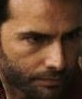

In [23]:
Image(str(df_train_male_images['filename'].iloc[0]))

In [24]:
df_train_male_images.head()

,filename
0,Training/male/106691.jpg.jpg
1,Training/male/161465.jpg.jpg
2,Training/male/146840.jpg.jpg
3,Training/male/104074.jpg.jpg
4,Training/male/119127.jpg.jpg


In [25]:
df_train_female_images.describe()

,filename
count,23243
unique,23243
top,Training/female/197306.jpg.jpg
freq,1


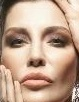

In [26]:
Image(str(df_train_female_images['filename'].iloc[0]))

In [27]:
df_train_female_images.head()

,filename
0,Training/female/175104.jpg.jpg
1,Training/female/160285.jpg.jpg
2,Training/female/161089.jpg.jpg
3,Training/female/158712.jpg.jpg
4,Training/female/172567.jpg.jpg


In [28]:
df_validation_male_images.describe()

,filename
count,5808
unique,5808
top,Validation/male/089213.jpg.jpg
freq,1


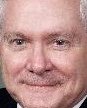

In [29]:
Image(str(df_validation_male_images['filename'].iloc[0]))

In [30]:
df_validation_male_images.head()

,filename
0,Validation/male/067000.jpg.jpg
1,Validation/male/075561.jpg.jpg
2,Validation/male/090265.jpg.jpg
3,Validation/male/074248.jpg.jpg
4,Validation/male/067767.jpg.jpg


In [31]:
df_validation_female_images.describe()

,filename
count,5841
unique,5841
top,Validation/female/114871.jpg.jpg
freq,1


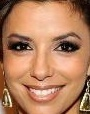

In [32]:
Image(str(df_validation_female_images['filename'].iloc[0]))

In [33]:
df_validation_female_images.head()

,filename
0,Validation/female/126582.jpg.jpg
1,Validation/female/125850.jpg.jpg
2,Validation/female/115264.jpg.jpg
3,Validation/female/121888.jpg.jpg
4,Validation/female/120504.jpg.jpg


In [34]:
# let's add a gender column to every dataframe created
df_train_male_images['gender'] = 'male'
df_train_male_images

,filename,gender
0,Training/male/106691.jpg.jpg,male
1,Training/male/161465.jpg.jpg,male
2,Training/male/146840.jpg.jpg,male
3,Training/male/104074.jpg.jpg,male
4,Training/male/119127.jpg.jpg,male
...,...,...
23761,Training/male/180743.jpg.jpg,male
23762,Training/male/144428.jpg.jpg,male
23763,Training/male/135548.jpg.jpg,male
23764,Training/male/170082.jpg.jpg,male


In [35]:
# let's add a gender column to every dataframe created
df_train_female_images['gender'] = 'female'
df_train_female_images

,filename,gender
0,Training/female/175104.jpg.jpg,female
1,Training/female/160285.jpg.jpg,female
2,Training/female/161089.jpg.jpg,female
3,Training/female/158712.jpg.jpg,female
4,Training/female/172567.jpg.jpg,female
...,...,...
23238,Training/female/172640.jpg.jpg,female
23239,Training/female/197868.jpg.jpg,female
23240,Training/female/149245.jpg.jpg,female
23241,Training/female/151764.jpg.jpg,female


In [36]:
# let's add a gender column to every dataframe created
df_validation_male_images['gender'] = 'male'
df_validation_male_images

,filename,gender
0,Validation/male/067000.jpg.jpg,male
1,Validation/male/075561.jpg.jpg,male
2,Validation/male/090265.jpg.jpg,male
3,Validation/male/074248.jpg.jpg,male
4,Validation/male/067767.jpg.jpg,male
...,...,...
5803,Validation/male/088652.jpg.jpg,male
5804,Validation/male/069536.jpg.jpg,male
5805,Validation/male/074622.jpg.jpg,male
5806,Validation/male/077419.jpg.jpg,male


In [37]:
# let's add a gender column to every dataframe created
df_validation_female_images['gender'] = 'female'
df_validation_female_images

,filename,gender
0,Validation/female/126582.jpg.jpg,female
1,Validation/female/125850.jpg.jpg,female
2,Validation/female/115264.jpg.jpg,female
3,Validation/female/121888.jpg.jpg,female
4,Validation/female/120504.jpg.jpg,female
...,...,...
5836,Validation/female/123480.jpg.jpg,female
5837,Validation/female/130183.jpg.jpg,female
5838,Validation/female/125198.jpg.jpg,female
5839,Validation/female/127804.jpg.jpg,female


In [38]:
# concatinate the training dataset
df_train = pd.concat([df_train_male_images,df_train_female_images],axis=0)
df_train

,filename,gender
0,Training/male/106691.jpg.jpg,male
1,Training/male/161465.jpg.jpg,male
2,Training/male/146840.jpg.jpg,male
3,Training/male/104074.jpg.jpg,male
4,Training/male/119127.jpg.jpg,male
...,...,...
23238,Training/female/172640.jpg.jpg,female
23239,Training/female/197868.jpg.jpg,female
23240,Training/female/149245.jpg.jpg,female
23241,Training/female/151764.jpg.jpg,female


In [39]:
df_train.value_counts()

filename                        gender
Training/male/202596.jpg.jpg    male      1
Training/male/202351.jpg.jpg    male      1
Training/male/202359.jpg.jpg    male      1
Training/male/202360.jpg.jpg    male      1
Training/male/202362.jpg.jpg    male      1
                                         ..
Training/female/131428.jpg.jpg  female    1
Training/female/131429.jpg.jpg  female    1
Training/female/131432.jpg.jpg  female    1
Training/female/131433.jpg.jpg  female    1
Training/female/131435.jpg.jpg  female    1
Length: 47009, dtype: int64

In [40]:
df_train.describe()

,filename,gender
count,47009,47009
unique,47009,2
top,Training/female/197306.jpg.jpg,male
freq,1,23766


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47009 entries, 0 to 23242
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  47009 non-null  object
 1   gender    47009 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [42]:
df_train.isna().sum()

filename    0
gender      0
dtype: int64

In [43]:
df_validation = pd.concat([df_validation_male_images,df_validation_female_images],axis=0)
df_validation

,filename,gender
0,Validation/male/067000.jpg.jpg,male
1,Validation/male/075561.jpg.jpg,male
2,Validation/male/090265.jpg.jpg,male
3,Validation/male/074248.jpg.jpg,male
4,Validation/male/067767.jpg.jpg,male
...,...,...
5836,Validation/female/123480.jpg.jpg,female
5837,Validation/female/130183.jpg.jpg,female
5838,Validation/female/125198.jpg.jpg,female
5839,Validation/female/127804.jpg.jpg,female


In [44]:
df_validation.describe()

,filename,gender
count,11649,11649
unique,11649,2
top,Validation/female/114871.jpg.jpg,female
freq,1,5841


In [45]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 0 to 5840
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  11649 non-null  object
 1   gender    11649 non-null  object
dtypes: object(2)
memory usage: 273.0+ KB


In [46]:
df_validation.isna().sum()

filename    0
gender      0
dtype: int64

In [47]:
df_train.to_csv('df_train_unshuffled.csv')
df_validation.to_csv('df_validation_unshuffled.csv')

In [48]:
# Now let's shuffle both data frames
df_train_shuffled = df_train.sample(frac=1)
df_validation_shuffled = df_validation.sample(frac=1)

In [49]:
df_train_shuffled.head(20)

,filename,gender
18588,Training/female/157603.jpg.jpg,female
1640,Training/male/189684.jpg.jpg,male
20364,Training/female/196942.jpg.jpg,female
8210,Training/male/169540.jpg.jpg,male
19036,Training/female/154239.jpg.jpg,female
20333,Training/female/161258.jpg.jpg,female
5895,Training/male/121113.jpg.jpg,male
4250,Training/female/147198.jpg.jpg,female
13041,Training/male/164475.jpg.jpg,male
13450,Training/female/171077.jpg.jpg,female


In [50]:
df_validation_shuffled.head(20)

,filename,gender
956,Validation/female/117261.jpg.jpg,female
2423,Validation/female/115979.jpg.jpg,female
1823,Validation/female/118061.jpg.jpg,female
2560,Validation/male/072312.jpg.jpg,male
3329,Validation/female/113181.jpg.jpg,female
5806,Validation/male/077419.jpg.jpg,male
575,Validation/female/117591.jpg.jpg,female
3765,Validation/male/067119.jpg.jpg,male
5481,Validation/female/130234.jpg.jpg,female
4668,Validation/male/086829.jpg.jpg,male


In [51]:
# let's split our data
X_train = df_train_shuffled.drop('gender', axis=1)
X_validation = df_validation_shuffled.drop('gender',axis=1)
y_train = df_train_shuffled['gender']
y_validation = df_validation_shuffled['gender']


In [52]:
X_train

,filename
18588,Training/female/157603.jpg.jpg
1640,Training/male/189684.jpg.jpg
20364,Training/female/196942.jpg.jpg
8210,Training/male/169540.jpg.jpg
19036,Training/female/154239.jpg.jpg
...,...
3559,Training/male/196667.jpg.jpg
21779,Training/male/140296.jpg.jpg
18879,Training/female/137244.jpg.jpg
14154,Training/female/178110.jpg.jpg


In [53]:
y_train

18588    female
1640       male
20364    female
8210       male
19036    female
          ...  
3559       male
21779      male
18879    female
14154    female
14829      male
Name: gender, Length: 47009, dtype: object

In [54]:
X_validation

,filename
956,Validation/female/117261.jpg.jpg
2423,Validation/female/115979.jpg.jpg
1823,Validation/female/118061.jpg.jpg
2560,Validation/male/072312.jpg.jpg
3329,Validation/female/113181.jpg.jpg
...,...
2346,Validation/male/082194.jpg.jpg
2051,Validation/male/074814.jpg.jpg
1066,Validation/female/123044.jpg.jpg
3595,Validation/female/121733.jpg.jpg


In [55]:
y_validation

956     female
2423    female
1823    female
2560      male
3329    female
         ...  
2346      male
2051      male
1066    female
3595    female
2981      male
Name: gender, Length: 11649, dtype: object

In [56]:
# Let's use get dummies to convert the labels to binary values
y_train = pd.get_dummies(y_train)
y_train
y_train.drop('female',axis=1,inplace=True)
y_train

,male
18588,0
1640,1
20364,0
8210,1
19036,0
...,...
3559,1
21779,1
18879,0
14154,0


In [57]:
# Let's do the same to y_validation
y_validation = pd.get_dummies(y_validation)
y_validation.drop('female',axis=1,inplace=True)
y_validation

,male
956,0
2423,0
1823,0
2560,1
3329,0
...,...
2346,1
2051,1
1066,0
3595,0


In [58]:
len(y_train),len(X_train)

(47009, 47009)

In [59]:
len(y_validation),len(X_validation)

(11649, 11649)

In [60]:
from matplotlib.pyplot import imread
train_images = []
for image_file_path in X_train['filename']:
  image = imread(image_file_path)
  train_images.append(image)
len(train_images)

47009

In [61]:
validation_images = []
for image_file_path in X_validation['filename']:
  image = imread(image_file_path)
  validation_images.append(image)
len(validation_images)

11649

In [62]:
print(train_images[0])

[[[ 57  25  14]
  [ 49  17   6]
  [ 56  26  16]
  ...
  [ 95  49  26]
  [ 71  24   6]
  [ 74  27  11]]

 [[ 49  17   6]
  [ 52  20   9]
  [ 57  27  16]
  ...
  [123  77  54]
  [ 98  51  31]
  [ 82  35  17]]

 [[ 50  18   5]
  [ 62  30  17]
  [ 69  37  24]
  ...
  [141  97  72]
  [127  82  59]
  [ 87  42  21]]

 ...

 [[ 80  26  16]
  [ 90  36  24]
  [ 97  43  31]
  ...
  [ 15  11   8]
  [ 14  13  11]
  [ 16  15  13]]

 [[ 87  32  25]
  [ 88  34  24]
  [ 90  36  24]
  ...
  [ 16  12   9]
  [ 15  14  12]
  [ 16  15  13]]

 [[ 85  30  23]
  [ 86  32  22]
  [ 89  35  25]
  ...
  [ 18  14  11]
  [ 17  16  14]
  [ 18  17  15]]]


In [63]:
train_images[0].shape

(106, 76, 3)

In [64]:
print(validation_images[0])

[[[149 123  96]
  [155 129 102]
  [161 135 110]
  ...
  [144 108  86]
  [131  93  72]
  [136  98  75]]

 [[144 118  91]
  [152 126  99]
  [158 132 107]
  ...
  [151 114  95]
  [139 101  80]
  [142 104  81]]

 [[135 109  82]
  [146 120  93]
  [152 126 101]
  ...
  [167 132 112]
  [152 116  94]
  [135  99  77]]

 ...

 [[175 115  87]
  [190 133 104]
  [193 136 109]
  ...
  [  7   7   9]
  [  8   9  11]
  [  8   9  11]]

 [[176 116  88]
  [193 133 105]
  [198 138 112]
  ...
  [ 20  20  22]
  [  0   1   3]
  [ 11  12  14]]

 [[176 115  87]
  [195 135 107]
  [204 144 116]
  ...
  [ 20  20  20]
  [  0   0   2]
  [ 11  11  13]]]


In [65]:
validation_images[0].shape

(109, 86, 3)

In [66]:
# how much of data do we have as training samples and testion samples
print("number of training examples:" , X_train.shape[0])
print("number of test examples:" , X_validation.shape[0])

number of training examples: 47009
number of test examples: 11649


In [67]:
X_train['image'] = train_images
X_train

,filename,image
18588,Training/female/157603.jpg.jpg,"[[[57, 25, 14], [49, 17, 6], [56, 26, 16], [68..."
1640,Training/male/189684.jpg.jpg,"[[[116, 89, 72], [88, 61, 44], [99, 72, 55], [..."
20364,Training/female/196942.jpg.jpg,"[[[253, 235, 197], [253, 235, 197], [246, 226,..."
8210,Training/male/169540.jpg.jpg,"[[[52, 40, 42], [51, 39, 39], [43, 29, 29], [4..."
19036,Training/female/154239.jpg.jpg,"[[[218, 203, 180], [213, 198, 175], [202, 187,..."
...,...,...
3559,Training/male/196667.jpg.jpg,"[[[18, 20, 17], [24, 24, 22], [26, 25, 21], [2..."
21779,Training/male/140296.jpg.jpg,"[[[22, 11, 15], [16, 5, 9], [13, 1, 5], [13, 1..."
18879,Training/female/137244.jpg.jpg,"[[[252, 254, 243], [244, 244, 232], [255, 249,..."
14154,Training/female/178110.jpg.jpg,"[[[56, 24, 3], [66, 34, 13], [78, 41, 22], [11..."


We have to experiment both gray scaled images and colored images to evaluate whether which images are performing well in image recognition.

Let's create grayscale images of each image

In [68]:
X_validation['image'] = validation_images
X_validation

,filename,image
956,Validation/female/117261.jpg.jpg,"[[[149, 123, 96], [155, 129, 102], [161, 135, ..."
2423,Validation/female/115979.jpg.jpg,"[[[98, 84, 73], [60, 46, 35], [47, 35, 23], [5..."
1823,Validation/female/118061.jpg.jpg,"[[[3, 5, 2], [3, 5, 2], [3, 5, 2], [3, 5, 2], ..."
2560,Validation/male/072312.jpg.jpg,"[[[91, 82, 75], [63, 54, 47], [47, 38, 31], [4..."
3329,Validation/female/113181.jpg.jpg,"[[[19, 13, 0], [31, 25, 11], [35, 31, 19], [25..."
...,...,...
2346,Validation/male/082194.jpg.jpg,"[[[35, 17, 7], [47, 29, 17], [43, 23, 12], [31..."
2051,Validation/male/074814.jpg.jpg,"[[[29, 35, 33], [0, 4, 2], [12, 14, 13], [13, ..."
1066,Validation/female/123044.jpg.jpg,"[[[20, 14, 14], [18, 12, 12], [17, 11, 15], [1..."
3595,Validation/female/121733.jpg.jpg,"[[[30, 26, 23], [36, 32, 29], [29, 25, 22], [2..."


In [69]:
X_train.drop('filename',axis=1,inplace=True)
X_train

,image
18588,"[[[57, 25, 14], [49, 17, 6], [56, 26, 16], [68..."
1640,"[[[116, 89, 72], [88, 61, 44], [99, 72, 55], [..."
20364,"[[[253, 235, 197], [253, 235, 197], [246, 226,..."
8210,"[[[52, 40, 42], [51, 39, 39], [43, 29, 29], [4..."
19036,"[[[218, 203, 180], [213, 198, 175], [202, 187,..."
...,...
3559,"[[[18, 20, 17], [24, 24, 22], [26, 25, 21], [2..."
21779,"[[[22, 11, 15], [16, 5, 9], [13, 1, 5], [13, 1..."
18879,"[[[252, 254, 243], [244, 244, 232], [255, 249,..."
14154,"[[[56, 24, 3], [66, 34, 13], [78, 41, 22], [11..."


In [70]:
X_train.shape

(47009, 1)

In [71]:
X_validation.drop('filename',axis=1,inplace=True)
X_validation

,image
956,"[[[149, 123, 96], [155, 129, 102], [161, 135, ..."
2423,"[[[98, 84, 73], [60, 46, 35], [47, 35, 23], [5..."
1823,"[[[3, 5, 2], [3, 5, 2], [3, 5, 2], [3, 5, 2], ..."
2560,"[[[91, 82, 75], [63, 54, 47], [47, 38, 31], [4..."
3329,"[[[19, 13, 0], [31, 25, 11], [35, 31, 19], [25..."
...,...
2346,"[[[35, 17, 7], [47, 29, 17], [43, 23, 12], [31..."
2051,"[[[29, 35, 33], [0, 4, 2], [12, 14, 13], [13, ..."
1066,"[[[20, 14, 14], [18, 12, 12], [17, 11, 15], [1..."
3595,"[[[30, 26, 23], [36, 32, 29], [29, 25, 22], [2..."


In [72]:
X_validation.shape

(11649, 1)

In [73]:
X_train['image'].iloc[0].shape

(106, 76, 3)

In [74]:
# Let's check whether the image and the from the file path is exactly equals to the image in the given number
df_train_shuffled

,filename,gender
18588,Training/female/157603.jpg.jpg,female
1640,Training/male/189684.jpg.jpg,male
20364,Training/female/196942.jpg.jpg,female
8210,Training/male/169540.jpg.jpg,male
19036,Training/female/154239.jpg.jpg,female
...,...,...
3559,Training/male/196667.jpg.jpg,male
21779,Training/male/140296.jpg.jpg,male
18879,Training/female/137244.jpg.jpg,female
14154,Training/female/178110.jpg.jpg,female


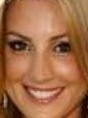

In [75]:
Image(str(df_train_shuffled['filename'].iloc[2]))

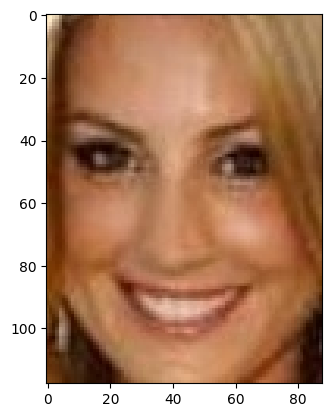

In [76]:
plt.imshow(X_train['image'].iloc[2])

Let's normalize training set

In [77]:
X_train.shape

(47009, 1)

Let's convert X_train to shape (47009,113,89,3)

It seems that all our images are not in the same size. Let's convert all our images to a same size

In [78]:
import cv2
import numpy as np

# Define the desired size (e.g., 113x89)
desired_size = (28, 28)

X_train_reshaped = []
for image in X_train['image']:
  # Convert image from DataFrame to NumPy array (if necessary)
  image_array = np.asarray(image)
  # Resize the image
  resized_image = cv2.resize(image_array, desired_size, interpolation=cv2.INTER_AREA)  # Use INTER_AREA for shrinking
  X_train_reshaped.append(resized_image)

X_train_reshaped = np.array(X_train_reshaped)


Convert image to 240x240x3

In [79]:
# # Define the desired size (e.g., 113x89)
# desired_size = (240, 240)

# X_train240_reshaped = []
# for image in X_train['image']:A
#   # Convert image from DataFrame to NumPy array (if necessary)
#   image_array = np.asarray(image)
#   # Resize the image
#   resized_image = cv2.resize(image_array, desired_size, interpolation=cv2.INTER_AREA)  # Use INTER_AREA for shrinking
#   X_train240_reshaped.append(resized_image)

# X_train_reshaped_240 = np.array(X_train240_reshaped)

In [80]:
X_train_reshaped.shape,#X_train_reshaped_240.shape

((47009, 28, 28, 3),)

In [81]:
X_train_reshaped[2]

array([[[238, 216, 183],
        [135, 108,  82],
        [ 87,  56,  33],
        ...,
        [160, 128,  88],
        [172, 139, 100],
        [173, 139, 101]],

       [[178, 146, 116],
        [ 98,  63,  38],
        [ 74,  33,  12],
        ...,
        [160, 127,  86],
        [167, 134,  94],
        [170, 136,  97]],

       [[155, 122,  85],
        [ 80,  43,  13],
        [ 89,  45,  21],
        ...,
        [166, 132,  92],
        [159, 126,  84],
        [168, 135,  92]],

       ...,

       [[ 88,  41,  11],
        [ 99,  67,  42],
        [ 62,  37,  16],
        ...,
        [ 92,  51,  29],
        [ 43,  14,   3],
        [ 43,  20,  16]],

       [[ 97,  48,  11],
        [ 82,  46,  15],
        [ 70,  41,  17],
        ...,
        [ 89,  47,  26],
        [ 42,  11,   2],
        [ 38,  10,   6]],

       [[110,  60,  18],
        [ 88,  45,  11],
        [ 71,  36,  10],
        ...,
        [ 85,  43,  21],
        [ 42,  14,   2],
        [ 45,  17,  13]]], dtype=uint8)

In [82]:
#X_train_reshaped_240[2]

Great!! now we have properly reshaped array of images in a form of nd array

In [83]:
y_train.shape

(47009, 1)

In [84]:
y_train_ = y_train.to_numpy()
y_train_ = y_train_.reshape(-1)

Let's reshape y_train to 1 dimensions

In [85]:
y_train_.shape
y_train = y_train_
y_train.shape

(47009,)

In [86]:
X_validation.shape

(11649, 1)

Our images in the validation dataset is in different shapes. Let's convert all the images shapes to 28,28,3 and form a numpy array of 11649,28,28,3

In [87]:
X_validation_reshaped = []
for image in X_validation['image']:
  # Convert image from DataFrame to NumPy array (if necessary)
  image_array = np.asarray(image)
  # Resize the image
  resized_image = cv2.resize(image_array, desired_size, interpolation=cv2.INTER_AREA)  # Use INTER_AREA for shrinking
  X_validation_reshaped.append(resized_image)

X_validation_reshaped = np.array(X_validation_reshaped)

Convert image to 240x240x3

In [88]:
# # Define the desired size (e.g., 113x89)
# desired_size = (240, 240)

# X_validation240_reshaped = []
# for image in X_validation['image']:
#   # Convert image from DataFrame to NumPy array (if necessary)
#   image_array = np.asarray(image)
#   # Resize the image
#   resized_image = cv2.resize(image_array, desired_size, interpolation=cv2.INTER_AREA)  # Use INTER_AREA for shrinking
#   X_validation240_reshaped.append(resized_image)

# X_validation_reshaped_240 = np.array(X_validation240_reshaped)

In [89]:
X_validation_reshaped.shape,#X_validation_reshaped_240.shape

((11649, 28, 28, 3),)

In [90]:
X_validation_reshaped[2]

array([[[  3,   5,   2],
        [  3,   5,   3],
        [  1,   6,   2],
        ...,
        [118, 102,  80],
        [129, 120, 101],
        [172, 168, 157]],

       [[  3,   5,   1],
        [  3,   5,   1],
        [  3,   5,   2],
        ...,
        [133, 118,  93],
        [147, 137, 115],
        [181, 176, 159]],

       [[  2,   5,   0],
        [  3,   5,   0],
        [  3,   5,   0],
        ...,
        [172, 155, 130],
        [182, 170, 144],
        [201, 193, 173]],

       ...,

       [[ 17,  12,   3],
        [ 26,  22,  10],
        [ 32,  28,  14],
        ...,
        [227, 212, 215],
        [231, 214, 230],
        [232, 213, 240]],

       [[ 28,  20,  10],
        [ 29,  21,  11],
        [ 44,  35,  21],
        ...,
        [228, 218, 214],
        [231, 218, 224],
        [231, 216, 232]],

       [[ 35,  30,  19],
        [ 36,  30,  18],
        [ 54,  45,  30],
        ...,
        [225, 220, 209],
        [231, 223, 219],
        [233, 222, 228]]], dtype=uint8)

In [91]:
#X_validation_reshaped_240[2]

In [92]:
# X_validation = X_validation_reshaped

In [93]:
# X_validation[0]

In [94]:
y_validation.shape

(11649, 1)

Let's convert y_validation to 1 dimensions

In [95]:
y_validation = y_validation.to_numpy().reshape(-1)
y_validation.shape

(11649,)

Now we have created our data to the required format

In [96]:
X_train_reshaped.shape , y_train.shape, X_validation_reshaped.shape, y_validation.shape

((47009, 28, 28, 3), (47009,), (11649, 28, 28, 3), (11649,))

Let's see some images of our dataset and it's correspond target value

Now we have created arrays of x_train, y_train, x_validation, y_validation data.
Also it is required to note X_train and X_validation arrays hold images with 3 channels which means these images are color images

**Color images **

# What images to use for the gender recognition task ?

I think it is better to experiment with both color images and gray scale images.

Let's first go with gray scale images and next we will try to go with color images and check whether which type of images are better fit for the task

In [97]:
# First of all let's normalize the values in the images arrays.
#X_train.shape

In [98]:
X_train_reshaped = X_train_reshaped / 255.0
#X_train_reshaped_240 = X_train_reshaped_240 / 255.0

X_validation_reshaped = X_validation_reshaped / 255.0
#X_validation_reshaped_240 = X_validation_reshaped_240 / 255.0

In [99]:
X_train_reshaped.shape

(47009, 28, 28, 3)

In [100]:
X_validation_reshaped.shape

(11649, 28, 28, 3)

Let's create the models

In [101]:
# from tensorflow import keras

# # Define the model
# model1 = keras.Sequential([
#   # Input layer for 28x28x3 images
#   keras.layers.Input(shape=(28,28, 3)),

#   # Convolution layer with 5x5 filters and 32 channels, followed by ReLU activation
#   keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),

#   # Max pooling layer with 2x2 pool size
#   keras.layers.MaxPooling2D(pool_size=(2, 2)),

#   # Second convolution layer with 5x5 filters and 32 channels, followed by ReLU activation
#   keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),

#   # Max pooling layer with 2x2 pool size
#   keras.layers.MaxPooling2D(pool_size=(2, 2)),

#   # Flatten the output from the convolutional layers
#   keras.layers.Flatten(),

#   # Fully connected layer with 2048 neurons and ReLU activation
#   keras.layers.Dense(2048, activation='relu'),

#   # **Dropout layer with keep probability 0.5**
#   keras.layers.Dropout(0.5),

#   # Fully connected layer with 1024 neurons and ReLU activation
#   keras.layers.Dense(1024, activation='relu'),

#   # **Dropout layer with keep probability 0.5**
#   keras.layers.Dropout(0.5),

#   # Fully connected layer with 10 neurons and ReLU activation
#   keras.layers.Dense(10, activation='relu'),

#   # Output layer with 1 neuron and sigmoid activation
#   keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model1.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print the model summary
# model1.summary()


In [102]:
#model1.fit(X_train_color,y_train,epochs=20,batch_size=50)

In [103]:

# Define the model
model3 = keras.Sequential([
  # Input layer for 28x28x3 images
  keras.layers.Input(shape=(28,28, 3)),

  # Convolution layer with 3x3 filters and 32 channels, followed by ReLU activation
  keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),

  # Max pooling layer with 2x2 pool size
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  # # Convolution layer with 3x3 filters and 32 channels, followed by ReLU activation
  # keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),

  # # Max pooling layer with 2x2 pool size
  # keras.layers.MaxPooling2D(pool_size=(2, 2)),


  # Second convolution layer with 3x3 filters and 32 channels, followed by ReLU activation
  keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

  # Max pooling layer with 2x2 pool size
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  # # Second convolution layer with 3x3 filters and 32 channels, followed by ReLU activation
  # keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

  # # Max pooling layer with 2x2 pool size
  # keras.layers.MaxPooling2D(pool_size=(2, 2)),


  # keras.layers.Conv2D(128,kernel_size=(3, 3),activation='relu'),
  # keras.layers.MaxPooling2D(pool_size=(2, 2)),

  # keras.layers.Conv2D(128,kernel_size=(3, 3),activation='relu'),
  # keras.layers.MaxPooling2D(pool_size=(2, 2)),

  # Flatten the output from the convolutional layers
  keras.layers.Flatten(),

  # Fully connected layer with 2048 neurons and ReLU activation
  keras.layers.Dense(2048, activation='relu'),

  # **Dropout layer with keep probability 0.5**
  keras.layers.Dropout(0.5),

  # Fully connected layer with 1024 neurons and ReLU activation
  keras.layers.Dense(1024, activation='relu'),

  # Fully connected layer with 512 neurons and ReLU activation
  keras.layers.Dense(512, activation='relu'),

  # Fully connected layer with 256 neurons and ReLU activation
  keras.layers.Dense(256, activation='relu'),

  # Output layer with 1 neuron and sigmoid activation
  keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 2048)              3

In [104]:
# run the model3 here
model3.fit(X_train_reshaped,y_train,epochs=20,batch_size=50)

Epoch 1/20
941/941 [==============================] - 13s 6ms/step - loss: 0.3010 - accuracy: 0.8703
Epoch 2/20
941/941 [==============================] - 6s 6ms/step - loss: 0.1856 - accuracy: 0.9307
Epoch 3/20
941/941 [==============================] - 6s 6ms/step - loss: 0.1623 - accuracy: 0.9405
Epoch 4/20
941/941 [==============================] - 5s 6ms/step - loss: 0.1522 - accuracy: 0.9443
Epoch 5/20
941/941 [==============================] - 6s 7ms/step - loss: 0.1423 - accuracy: 0.9486
Epoch 6/20
941/941 [==============================] - 5s 6ms/step - loss: 0.1347 - accuracy: 0.9524
Epoch 7/20
941/941 [==============================] - 6s 7ms/step - loss: 0.1310 - accuracy: 0.9539
Epoch 8/20
941/941 [==============================] - 5s 6ms/step - loss: 0.1259 - accuracy: 0.9564
Epoch 9/20
941/941 [==============================] - 6s 6ms/step - loss: 0.1200 - accuracy: 0.9571
Epoch 10/20
941/941 [==============================] - 6s 6ms/step - loss: 0.1163 - accuracy: 0.958

In [105]:
scores=model3.evaluate(X_validation_reshaped,y_validation)

365/365 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9581


In [106]:
print(model3.metrics_names[1],scores[1]*100)

accuracy 95.81080079078674


In [107]:
print(model3.metrics_names[0],scores[0]*100)

loss 14.1228586435318


In [108]:
X_validation_reshaped[0].shape

(28, 28, 3)

In [109]:
predictions = model3.predict(X_validation_reshaped)
binary_predictions = (predictions >= 0.5).astype(int)

365/365 [==============================] - 1s 2ms/step


In [110]:
binary_predictions.shape

(11649, 1)

In [111]:
binary_predictions[0:10]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

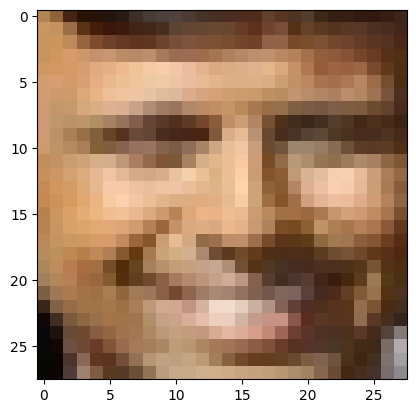

In [126]:
plt.imshow(X_validation_reshaped[9])

In [125]:
y_validation[9]

1

Our model has 95% accuracy on testing data, which is a good accuracy.

Let's save our trained model

In [114]:
# import pickle

# # save an existing model to a file.
# pickle.dump(model3, open("gender_recognizer_model_3.pkl","wb"))

In [115]:
# # Load model saved from the pickle
# loaded_gender_recognizer_model = pickle.load(open("gender_recognizer_model_3.pkl","rb"))

In [116]:
# Compile the model again before saving
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [117]:
scores=model3.evaluate(X_validation_reshaped,y_validation)

365/365 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9581


In [118]:
model3.save('/content/drive/MyDrive/gender_recognizer')

In [120]:
gen_recog = keras.models.load_model('/content/drive/MyDrive/gender_recognizer')

In [121]:
scores=gen_recog.evaluate(X_validation_reshaped,y_validation)

365/365 [==============================] - 3s 6ms/step - loss: 0.1412 - accuracy: 0.9581


In [138]:
#let's get prediction using loaded model
preds = gen_recog.predict(X_validation_reshaped[0:10])
bin_predictions = (preds >= 0.5).astype(int)
bin_predictions

1/1 [==============================] - 0s 20ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [127]:
y_validation[5]

1

In [128]:
X_validation_reshaped.shape

(11649, 28, 28, 3)

model2 is created to take grayscale images as inputs. Let's try it out.

Convert training and validaton images to gray color

In [129]:
# # Define an empty list to store the converted images
# X_train_gray = []

# # Loop through each image in X_train
# for image in X_train_reshaped:
#   # Convert the image from DataFrame element (if needed) to NumPy array
#   image_array = np.asarray(image)
#   image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')  # Normalize to 0-255 and convert to uint8
#   # Convert the image to grayscale using cv2.cvtColor
#   gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
#   # Append the grayscale image to the list
#   X_train_gray.append(gray_image)

# # Convert the list to a NumPy array
# X_train_gray = np.array(X_train_gray)


In [130]:
# # Define an empty list to store the converted images
# X_train_gray_240 = []

# # Loop through each image in X_train
# for image in X_train_reshaped_240:
#   # Convert the image from DataFrame element (if needed) to NumPy array
#   image_array = np.asarray(image)
#   image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')  # Normalize to 0-255 and convert to uint8
#   # Convert the image to grayscale using cv2.cvtColor
#   gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
#   # Append the grayscale image to the list
#   X_train_gray_240.append(gray_image)

# # Convert the list to a NumPy array
# X_train_gray_240 = np.array(X_train_gray_240)

In [131]:
# X_train_gray.shape, #X_train_gray_240.shape

In [132]:
# X_train_gray[0]

In [133]:
# # Define an empty list to store the converted images
# X_validation_gray = []

# # Loop through each image in X_train
# for image in X_validation_reshaped:
#   # Convert the image from DataFrame element (if needed) to NumPy array
#   image_array = np.asarray(image)
#   image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')  # Normalize to 0-255 and convert to uint8
#   # Convert the image to grayscale using cv2.cvtColor
#   gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
#   # Append the grayscale image to the list
#   X_validation_gray.append(gray_image)

# # Convert the list to a NumPy array
# X_validation_gray = np.array(X_validation_gray)

In [134]:
# # Define an empty list to store the converted images
# X_validation_gray_240 = []

# # Loop through each image in X_train
# for image in X_validation_reshaped_240:
#   # Convert the image from DataFrame element (if needed) to NumPy array
#   image_array = np.asarray(image)
#   image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')  # Normalize to 0-255 and convert to uint8
#   # Convert the image to grayscale using cv2.cvtColor
#   gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
#   # Append the grayscale image to the list
#   X_validation_gray_240.append(gray_image)

# # Convert the list to a NumPy array
# X_validation_gray_240 = np.array(X_validation_gray_240)

In [135]:
# X_validation_gray.shape, #X_validation_gray_240

In [136]:
# X_validation_gray[0]

In [137]:
# # Define the model
# model2 = keras.Sequential([
#   # Input layer for 28x28x3 images
#   keras.layers.Input(shape=(28,28, 1)),

#   # Convolution layer with 5x5 filters and 32 channels, followed by ReLU activation
#   keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),

#   # Max pooling layer with 2x2 pool size
#   keras.layers.MaxPooling2D(pool_size=(2, 2)),

#   # Second convolution layer with 5x5 filters and 32 channels, followed by ReLU activation
#   keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),

#   # Max pooling layer with 2x2 pool size
#   keras.layers.MaxPooling2D(pool_size=(2, 2)),
# #
#   # Flatten the output from the convolutional layers
#   keras.layers.Flatten(),

#   # Fully connected layer with 2048 neurons and ReLU activation
#   keras.layers.Dense(2048, activation='relu'),

#   # **Dropout layer with keep probability 0.5**
#   keras.layers.Dropout(0.5),

#   # Fully connected layer with 1024 neurons and ReLU activation
#   keras.layers.Dense(1024, activation='relu'),

#   # **Dropout layer with keep probability 0.5**
#   keras.layers.Dropout(0.5),

#   # Fully connected layer with 10 neurons and ReLU activation
#   keras.layers.Dense(10, activation='relu'),

#   # Output layer with 1 neuron and sigmoid activation
#   keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model2.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print the model summary
# model2.summary()
